# Final Project

Al Haque, Taha Ahmed

Here is my attempt at trying to perform text-classification on our data-frame, for our final project we decided to see if the game_description of a game has any effect on selling copies

In [1]:
## Import the Libraries we need 

import pandas as pd
import numpy as np
import nltk
import re

In [2]:
## Here we will read in our data-frame we have created..
df = pd.read_csv('C:\\Users\\Al Haque\\OneDrive\\Desktop\\Data 620 Web Analytics\\Games2.csv')

df.head(15)

,Unnamed: 0,Steam_Id,Name,Description,Copies_Sold
0,0,1989890,X-Plane 11 - Add-on: Globall Art - SBGR - São ...,This scenery was built based on studies and re...,NaN
1,1,1989900,Femdom Waifu VR: Latex Lingerie Pack,IMPORTANT NOTE:TO ACTIVATE THIS DLC IN THE STA...,NaN
2,2,1989920,白娘子,"""White lady"" is a 3D stand-alone role-playing ...",1287.0
3,3,1989930,Drone Tinkerer,THE GAMEDrone Tinkerer is your drone racing an...,0.0
4,4,1989940,Hentai Packer,Pack sexy girl called Lucy into tight spaces i...,144.0
5,5,1989950,Snack Stall,AboutThis game is a simulation fast food resta...,365.0
6,6,1989960,AirShooShoo,"A unique platformer, where you have to collect...",0.0
7,7,1989970,Stuff Enuff: Plush Party,"Introducing Stuff Enuff, an engaging party gam...",0.0
8,8,1989990,Touhou Crisis,This is a derivative fan-work of the Touhou Pr...,16378.0
9,9,1990000,Touhou Crisis - Artbook & Soundtrack,"If you enjoyed Touhou Crisis, consider showing...",NaN


Here we see that the data-frame contains the steam_id of the game, the name of the game and the copies sold for each individual game

# Data Cleaning
Here we will clean up the data-frame by removing the unnecessary columns, remove empty observations from our copies_sold column and re-convert the Copies_Sold column into a classification column since we will perform text-classification

In [3]:
df2 = df[['Steam_Id','Name','Description','Copies_Sold']]

df2

,Steam_Id,Name,Description,Copies_Sold
0,1989890,X-Plane 11 - Add-on: Globall Art - SBGR - São ...,This scenery was built based on studies and re...,NaN
1,1989900,Femdom Waifu VR: Latex Lingerie Pack,IMPORTANT NOTE:TO ACTIVATE THIS DLC IN THE STA...,NaN
2,1989920,白娘子,"""White lady"" is a 3D stand-alone role-playing ...",1287.0
3,1989930,Drone Tinkerer,THE GAMEDrone Tinkerer is your drone racing an...,0.0
4,1989940,Hentai Packer,Pack sexy girl called Lucy into tight spaces i...,144.0
...,...,...,...,...
243,1979071,MX vs ATV Legends - Track Pass,The Track Pass grants you access to 22 tracks ...,NaN
244,1979072,MX vs ATV Legends - Supercross World Tour,Compete on six huge and challenging tracks in ...,NaN
245,1979073,MX vs ATV Legends - Honda Pack 2022,Start your engines! Purchase the Honda Pack an...,NaN
246,1979074,MX vs ATV Legends - Husqvarna Pack 2022,Start your engines! Purchase the Husqvarna Pac...,NaN


In [4]:
## Remove the empty observations

df2 = df2[df2['Copies_Sold'].notnull()]

df2

,Steam_Id,Name,Description,Copies_Sold
2,1989920,白娘子,"""White lady"" is a 3D stand-alone role-playing ...",1287.0
3,1989930,Drone Tinkerer,THE GAMEDrone Tinkerer is your drone racing an...,0.0
4,1989940,Hentai Packer,Pack sexy girl called Lucy into tight spaces i...,144.0
5,1989950,Snack Stall,AboutThis game is a simulation fast food resta...,365.0
6,1989960,AirShooShoo,"A unique platformer, where you have to collect...",0.0
...,...,...,...,...
232,1978890,Cartographer,"The world is a mystery, and it's time for a Ca...",30.0
233,1978900,Defying Fate,"Since the dawn of interstellar travel, humanit...",15.0
234,1978920,Bean Story,"A Story About a Teenager, who got Taken away, ...",104.0
236,1978970,Heart is Muscle,You have 24 hours to out-muscle the competiti...,60.0


Removing all of the NA observations we now have 157 rows and 4 columns so we removed almost 100 observations from our data-frame

We have to convert the Copies_Sold column into a classification column, where 0 represents no copies of the game were sold and a 1 represents copies of the game being sold

In [94]:
## Here we created a new column where if the copies_sold are greater than 0 if greater than 0 copies were sold else a 0 means 
# copies were not sold


## How to remove the warning possibly?
df2.loc[:,'Copies_Sold2'] = np.where(df2['Copies_Sold'] > 0, 1,0)


df2

,Steam_Id,Name,Description,Copies_Sold,Copies_Sold2,Clean_Description
2,1989920,白娘子,"""White lady"" is a 3D stand-alone role-playing ...",1287.0,1,White lady 3D standalone roleplaying game deve...
3,1989930,Drone Tinkerer,THE GAMEDrone Tinkerer is your drone racing an...,0.0,0,THE GAMEDrone Tinkerer drone racing fighting e...
4,1989940,Hentai Packer,Pack sexy girl called Lucy into tight spaces i...,144.0,1,Pack sexy girl called Lucy tight spaces high q...
5,1989950,Snack Stall,AboutThis game is a simulation fast food resta...,365.0,1,AboutThis game simulation fast food restaurant...
6,1989960,AirShooShoo,"A unique platformer, where you have to collect...",0.0,0,A unique platformer collect stars shards flyin...
...,...,...,...,...,...,...
232,1978890,Cartographer,"The world is a mystery, and it's time for a Ca...",30.0,1,The world mystery time Cartographer make map w...
233,1978900,Defying Fate,"Since the dawn of interstellar travel, humanit...",15.0,1,Since dawn interstellar travel humanity domina...
234,1978920,Bean Story,"A Story About a Teenager, who got Taken away, ...",104.0,1,A Story About Teenager got Taken away getting ...
236,1978970,Heart is Muscle,You have 24 hours to out-muscle the competiti...,60.0,1,You 24 hours outmuscle competition become mayo...


# Data Preprocessing 

Now that we have cleaned up most of the data-frame and removed columns and added a classification column. We will now further clean up the description column by removing puncuncation, stopwords and convert all of the words to lower-case before we feed it into our machine-learning algorithms

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

## First we need to remove the puncunation

## Apparently I have to use loc if I want to add a new column too it
df2.loc[:, 'Clean_Description']= df2['Description'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

df2.loc[:, 'Clean_Description'] = df2['Clean_Description'].apply(lambda x: word_tokenize(x))

## Call for the stopwords 
stop_words = set(stopwords.words('english'))

## Remove all the stopwords and then recreate it back as a sentence.. 
df2.loc[:, 'Clean_Description'] = df2['Clean_Description'].apply(lambda x: [word for word in x if word not in stop_words])
df2.loc[:, 'Clean_Description'] = df2['Clean_Description'].apply(lambda x: ' '.join(x))

df2

,Steam_Id,Name,Description,Copies_Sold,Copies_Sold2,Clean_Description
2,1989920,白娘子,"""White lady"" is a 3D stand-alone role-playing ...",1287.0,1,White lady 3D standalone roleplaying game deve...
3,1989930,Drone Tinkerer,THE GAMEDrone Tinkerer is your drone racing an...,0.0,0,THE GAMEDrone Tinkerer drone racing fighting e...
4,1989940,Hentai Packer,Pack sexy girl called Lucy into tight spaces i...,144.0,1,Pack sexy girl called Lucy tight spaces high q...
5,1989950,Snack Stall,AboutThis game is a simulation fast food resta...,365.0,1,AboutThis game simulation fast food restaurant...
6,1989960,AirShooShoo,"A unique platformer, where you have to collect...",0.0,0,A unique platformer collect stars shards flyin...
...,...,...,...,...,...,...
232,1978890,Cartographer,"The world is a mystery, and it's time for a Ca...",30.0,1,The world mystery time Cartographer make map w...
233,1978900,Defying Fate,"Since the dawn of interstellar travel, humanit...",15.0,1,Since dawn interstellar travel humanity domina...
234,1978920,Bean Story,"A Story About a Teenager, who got Taken away, ...",104.0,1,A Story About Teenager got Taken away getting ...
236,1978970,Heart is Muscle,You have 24 hours to out-muscle the competiti...,60.0,1,You 24 hours outmuscle competition become mayo...


# Splitting the data into training and testing

Now that we have properly preprocessed the data we will now begin split our data into training and testing

In [22]:
## This is to split the data into training and testing set 

from sklearn.model_selection import train_test_split

## We will split the training and testing set to 80% and 20%
X_train,X_test,y_train,y_test = train_test_split(df2['Clean_Description'],df2['Copies_Sold2'],test_size = 0.2,random_state=42)

In [31]:
X_train.shape

(125,)

In [30]:
X_test.shape

(32,)

# Bag of Words

Since we need to convert our text-data into numbers we will use the bag of words algorithm to transform our data into numbers before we feed it

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# Here we will stick for a 1 to 2-word ngram so that the matrix does not get too large 
vectorizer = CountVectorizer(ngram_range=(1, 2))

train_x_vectors = vectorizer.fit_transform(X_train)

## Okay so the documentation says to use get_feature_names_out()) to get features name out
print(vectorizer.get_feature_names_out())


['10' '10 15' '10 drivers' ...
 '集国战玩法策略回合卡牌武将养成于一身的卡牌游戏 近百名史诗武将震撼登场自由个性养成组建百变阵容体验丰富有挑战的pve玩法让三国历史战役在你的指尖生动重现游戏倡导养肝护肝放置挂机绿色游戏'
 '鼠标左键射击' '鼠标左键射击 空格键跳跃']


In [45]:
## Here we get the array out, the array appears to be sparse
print(train_x_vectors.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Text-Classification For Bag of Words
For this section, I will  use Support Vector Machine and to fit a model and see how well it performs on the test set. We fit the model using the transformed description set and with the y_values and then try to predict the copies_sold

### Support Vector Machine
Here I will use svm with a linear kernel since I heard it was a really good classifier

In [46]:
from sklearn import svm
from sklearn.metrics import accuracy_score
clf_svm = svm.SVC(kernel = 'linear')
clf_svm.fit(train_x_vectors,y_train)

SVC(kernel='linear')

I will transform the X_test and then our svm model to predict if it works

In [47]:
## Transfrom the test-set
test_x_vectors = vectorizer.transform(X_test)

## Then we predict with the svm model

y_pred = clf_svm.predict(test_x_vectors)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

The svm models appears to have predicted that all copies will sell for the bag_of_words transformation

In [50]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.75


Here we got an accuracy score of 0.75 which looks okay I guess 

In [52]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[ 0  8]
 [ 0 24]]


AUC for our classifier is: 0.5


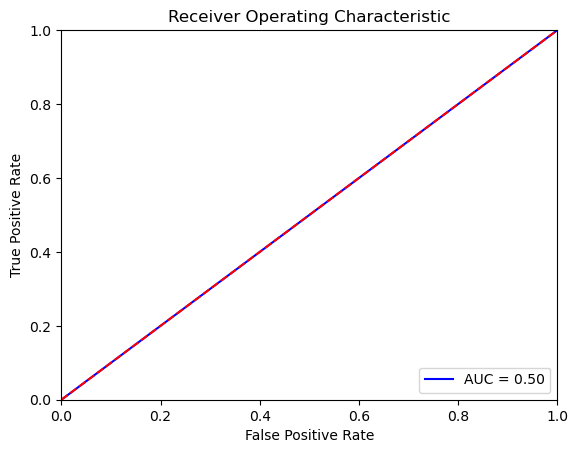

In [57]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC

import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Okay we have an AUC score of 0.5 which tells us that our classifier does not have any class-seperation capacity which is not a good start, so clearly the bag-of-words transformation is not working

# TF-IDF

For this section we will now do a tf-idf transformation and see if this transformation can create a better classifier, Tf-idf bassically counts the # of terms that occur in  a document 

In [59]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
## We are going to make a tf-idf with a bigram of 1 and 2
tfidf_transformer=TfidfVectorizer(ngram_range = (1,2))

## Pass the Text-object

## To make the td_idf
tf_idf_x = tfidf_transformer.fit_transform(X_train)

## Also transform the test-set using the same_vectorizer
tf_idf_test = tfidf_transformer.transform(X_test)

In [78]:
## So we have 125 rows and 21000 features transfromed
tf_idf_x.shape

(125, 21005)

In [79]:
## Again the matrix is sparse
tf_idf_x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Text-Classification using Tf-Idf transformation

### Support Vector Machine 
Now I am going to implement SVM again with the tf-idf transformation

In [80]:
clf_svm_wv_i = svm.SVC(kernel = 'linear')
clf_svm_wv_i.fit(tf_idf_x,y_train)

SVC(kernel='linear')

In [81]:
#y_pred is the tf-idf transformation now
y_pred2 = clf_svm_wv_i.predict(tf_idf_test)

y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

This doesn't look too good it predicted all 1's again

In [88]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred2)


# Likewise the accuracy score is the same as the bag of words transformation
print("Accuracy:", accuracy)

Accuracy: 0.75


In [91]:
## Same confusion matrix scores
print(confusion_matrix(y_test,y_pred2))

[[ 0  8]
 [ 0 24]]


AUC for our classifier is: 0.5


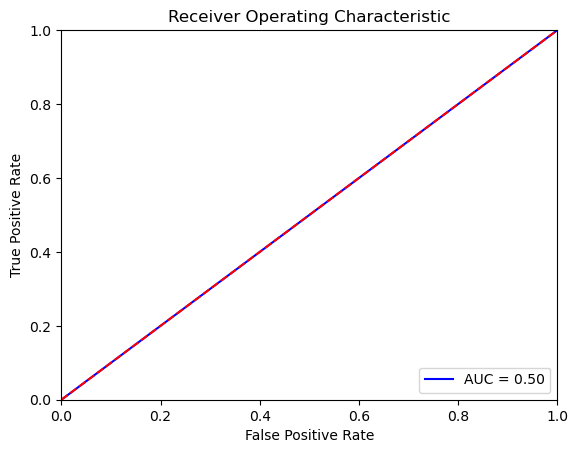

In [82]:
fpr, tpr, threshold = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC

import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Unfornatuely,it appears a tf-idf transformation has not worked and the AUC score is still the same

# Word Vector 

Word Vectors attempt to captures the semantic meaning of a word in a vector 

Here I will attempt to use the word-vector transformation to see if it will help improve the model classification of the copies_sold column

I will use the spacy library in order to implement and use the word_vector algorithms

## Here is the code I have used to install spacy on my desktop

convert it to a code chunk to install spacy

!pip install spacy
!python -m spacy download en_core_web_md

In [83]:
## Import the spacy library

import spacy

nlp = spacy.load("en_core_web_md")

In [84]:
docs = [nlp(text) for text in X_train]
train_x_word_vector = [x.vector for x in docs]
## It shows a word-vector representation for all of our elements in the list which is the japanese game..
print(train_x_word_vector)

[array([ 3.02479081e-02,  1.27771056e+00, -1.37273991e+00,  1.34487957e-01,
        2.57300591e+00,  1.23983526e+00,  6.40358031e-01,  3.56344533e+00,
       -2.50135994e+00,  8.20938945e-02,  5.42954922e+00,  8.36820781e-01,
       -4.18191862e+00,  2.22221160e+00,  1.91779196e+00,  7.13663578e-01,
        2.15006065e+00,  2.81286061e-01,  1.80868074e-01, -7.48225093e-01,
        9.36415792e-01,  5.16150177e-01, -1.02314651e+00, -8.48534405e-01,
       -6.11024261e-01, -1.22846043e+00, -1.96433377e+00, -1.44095743e+00,
       -6.21817768e-01,  2.13543916e+00,  8.02325904e-01, -9.00244489e-02,
       -5.06691858e-02, -2.06825614e+00, -1.17739655e-01, -9.28404152e-01,
        2.37059698e-01,  1.44056237e+00,  2.09282255e+00,  6.73963428e-01,
        3.39775950e-01, -5.14105633e-02, -8.92849714e-02,  8.40127349e-01,
       -1.94014156e+00,  2.29390407e+00,  1.37569857e+00, -1.87905133e+00,
        9.79793351e-03,  3.11773896e-01,  9.59849954e-01,  1.25220907e+00,
       -6.02938890e-01, 

## Support Vector Machine with Word Vector Transformation

Here we will use SVM again this time using the word_vector transformation that captures the semantic meanings of our game description

In [85]:
# Train the svm model using the word_vector
clf_svm_wv = svm.SVC(kernel = 'linear')
clf_svm_wv.fit(train_x_word_vector,y_train)

SVC(kernel='linear')

In [86]:
## Now we have to transform our x_test data

test_docs = [nlp(text) for text in X_test] 
test_word_vector = [x.vector for x in test_docs]

y_pred3 = clf_svm_wv.predict(test_word_vector)

y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

Already the word-vector seems to be a slight improvement than the tf-idf and bag-of-words algorithm we can see the classifier trying to classify some games will not sell due to their description

In [92]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred3)


# The score is still the same.. 
print("Accuracy:", accuracy)

Accuracy: 0.75


AUC for our classifier is: 0.5416666666666667


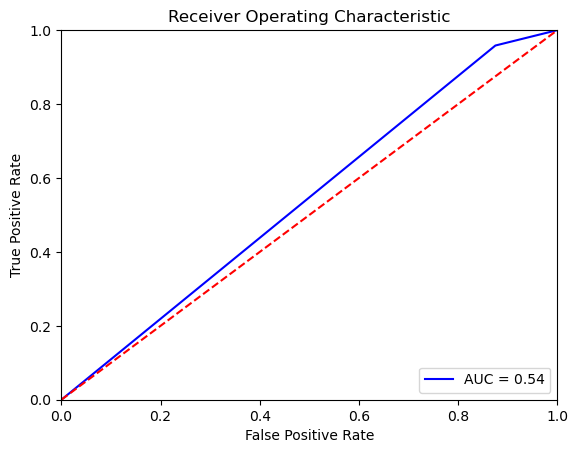

In [87]:
fpr, tpr, threshold = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC

import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Unfornateuly, the AUC score is not that high, with only a .4 increase but it appears the word-vector transformation seems to have done a slight job than the tf-idf and bag-of-words transformation

# Final Thoughts.

Looking at the scope of the project and the work that I have done it appears that it is difficult to tell if a game will sell based on their description, from the transformations that I have used i.e (tf-idf,bag of words, and word vectors) it appears that word-vectors have only made a slight improvement in the classifier but it stil appears to have done a terrible job 

Furthermore, the results of the SVM Model and the model we see that the predictions aren't doing well, this may stem from the fact that each utterance in the game description columns are unique from one another and thus the model have may have a difficult time predicting whether the game will sell, after all a horror game description may vary from a first-person shooter game description and thus it may be really difficult to predict whether the game will sell at all which could translate to a terrible classifier. 

# Work-Cited: 

Here is a list of sources I have consulted with for help on this project:

sklearn documentation for tf-idf:
https://scikitlearn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.transform

svm documentation:
https://scikit-learn.org/1.4/modules/generated/sklearn.svm.SVC.html

This guide I have used from analytics vidha to clean up text:
https://www.analyticsvidhya.com/blog/2021/09/creating-a-movie-reviews-classifier-using-tf-idf-in-python/

NLP Tutorial for Word-Vectors from Keith Galli (gr8 tutorial btw.)
https://www.youtube.com/watch?v=M7SWr5xObkA&ab_channel=KeithGalli

Gama-analytics API docs:
https://gamalytic.com/api-reference.txt

Steam-API Help Docs:
https://stackoverflow.com/questions/69512319/steam-api-to-get-game-info

